In [1]:
import numpy as np
import matplotlib.pyplot as plt

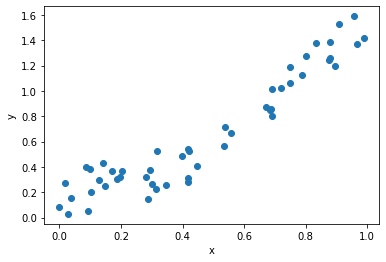

In [3]:
np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect
fig = plt.figure()
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

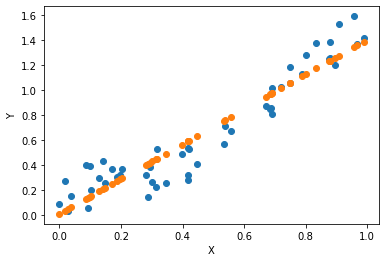

0.8919326382437994

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
output = model.predict(X)
fig = plt.figure()
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
display(model.score(X, y))

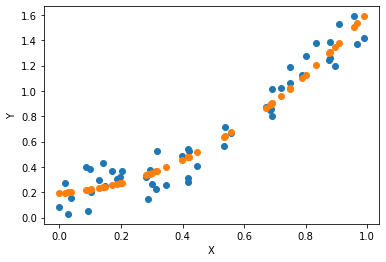

0.9372132277132781

In [6]:
from sklearn.preprocessing import StandardScaler

X_deg2 = np.hstack([X, X**2])
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)
fig = plt.figure()
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
display(model_deg2.score(X_deg2, y))


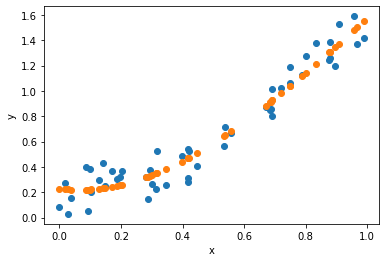

0.9384895307987051

In [7]:
X_deg3 = np.hstack([X, X**2, X**3])
model_deg3 = LinearRegression()
model_deg3.fit(X_deg3, y)
output = model_deg3.predict(X_deg3)
fig = plt.figure()
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
display(model_deg3.score(X_deg3, y))

(50, 4)

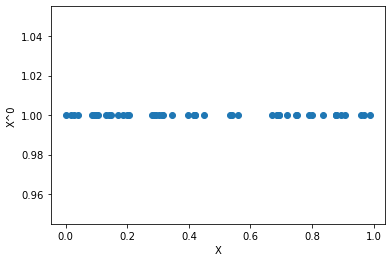

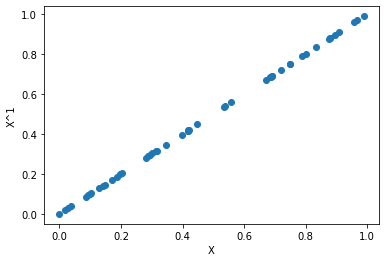

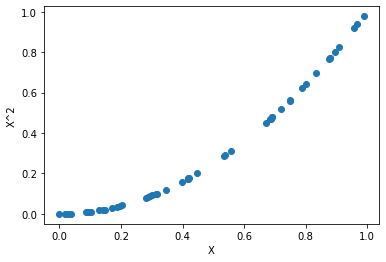

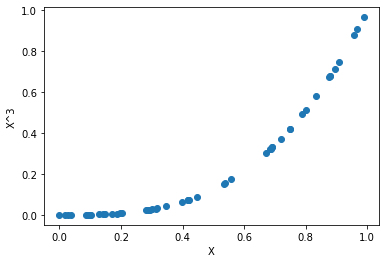

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
display(X_poly.shape) # shape of the generated features

n_features = X_poly.shape[1]

for degree in range(n_features):
    fig = plt.figure()
    plt.scatter(X, X_poly[:,degree])
    plt.xlabel("X")
    plt.ylabel(f"X^{degree}")
    plt.show()

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []
for i in range(1, 6):
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)
    model = LinearRegression()
    model.fit(X_poly_scaled, y)
    output = model.predict(X_poly_scaled)
    fig = plt.figure()
    plt.scatter(X, y, label="samples")
    plt.scatter(X, output, label="prediction")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Degree {i}")
    plt.show()
    display(model.score(X_poly_scaled, y))
    scores.append(model.score(X_poly_scaled, y))

NameError: name 'X' is not defined

In [ ]:
scores

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

degree = 50 # number of data-points
scores = []
for i in range(0, degree):
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)
    model = LinearRegression()
    model.fit(X_poly_scaled, y)
    output = model.predict(X_poly_scaled)
    scores.append(model.score(X_poly_scaled, y))

max_idx = np.argmax(scores)
print(max_idx, scores[max_idx])

**How does it perform with degree=5**

In [ ]:
poly = PolynomialFeatures(5)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
scaler.fit(X_poly)
X_poly_scaled = scaler.transform(X_poly)
model = LinearRegression()
model.fit(X_poly_scaled, y)
output = model.predict(X_poly_scaled)
fig = plt.figure()
plt.scatter(X, y, label="ground truth")
plt.scatter(X, output, label="prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Degree {5}")
plt.show()
display(model.score(X_poly_scaled, y))
scores.append(model.score(X_poly_scaled, y))

**How does it perform with degree=31**

In [ ]:
degree = 31
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
scaler.fit(X_poly)
X_poly_scaled = scaler.transform(X_poly)
model = LinearRegression()
model.fit(X_poly_scaled, y)
output = model.predict(X_poly_scaled)
fig = plt.figure()
plt.scatter(X, y, label="ground truth")
plt.scatter(X, output, label="prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Degree {degree}")
plt.show()
display(model.score(X_poly_scaled, y))
scores.append(model.score(X_poly_scaled, y))

## **Train Test Split**

In [3]:
# lets first generate a dataset of 100 points this time
np.random.seed(1)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
fig = plt.figure()
plt.scatter(X_train, y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

fig = plt.figure()
plt.scatter(X_test, y_test)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data")
plt.show()

In [ ]:
degree = 50 # number of data-points
scores = []
for i in range(0, degree):
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X_train)
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)
    model = LinearRegression()
    model.fit(X_poly_scaled, y_train)
    output = model.predict(X_poly_scaled)
    scores.append(model.score(X_poly_scaled, y_train))

max_idx = np.argmax(scores)
print(max_idx, scores[max_idx])

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
degree=5
polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
polyreg_scaled.fit(X_train,y_train)
display(polyreg_scaled.score(X_train, y_train))
display(polyreg_scaled.score(X_test, y_test))

In [ ]:
degree=40
polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
polyreg_scaled.fit(X_train,y_train)
display(polyreg_scaled.score(X_train, y_train))
display(polyreg_scaled.score(X_test, y_test))

## **Underfitting Overfitting**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

degrees = 32 # number of data-points
train_scores = []
test_scores = []

for degree in range(1, degrees):
    scaler = StandardScler()
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

In [ ]:
plt.figure()
plt.plot(list(range(1, 32)), train_scores, label="train")
plt.plot(list(range(1, 32)), test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R-score")
plt.show()